<a href="https://colab.research.google.com/github/rendyleo/Pengolahan-Citra/blob/main/Laporan%20Pengolahan%20Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Pengolahan Citra:
Identifikasi Kesehatan Daun Jagung
Kelas: Daun Sehat, Daun Kurang Sehat, Daun Sakit

# 1. Pendahuluan

Analisis kesehatan daun jagung sangat penting dalam mendeteksi dini gejala penyakit yang dapat mengurangi hasil panen. Dalam laporan ini, kami menggunakan kombinasi teknik pengolahan citra sederhana dan pengujian lebih lanjut untuk meningkatkan akurasi deteksi kondisi daun, termasuk Daun Sehat, Daun Kurang Sehat, dan Daun Sakit.

# 2. Metode Pengolahan Citra

Proses analisis mencakup dua bagian utama:



*   Teknik Sederhana: Penggunaan segmentasi warna untuk memisahkan area daun berdasarkan warna, seperti hijau untuk daun sehat, kuning untuk daun kurang sehat, dan coklat untuk daun sakit.
*   Pengujian Lebih Lanjut: Menggunakan ekstraksi fitur tambahan (tekstur, kontur, area kerusakan) serta pengaplikasian machine learning untuk klasifikasi yang lebih akurat.






# 3. Teknik Sederhana: Segmentasi Warna

Pertama, kita menggunakan OpenCV untuk melakukan segmentasi berdasarkan warna untuk mengidentifikasi setiap kelas daun. Berikut adalah langkah-langkah dan kode yang digunakan:

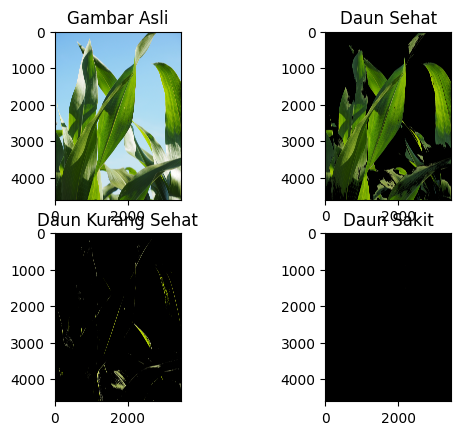

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca gambar daun
image = cv2.imread('/content/Daun Jagung.jpg')

# Mengubah gambar dari BGR ke HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisi rentang warna untuk masing-masing kelas
# Daun Sehat (hijau)
lower_green = np.array([35, 100, 50])
upper_green = np.array([85, 255, 255])

# Daun Kurang Sehat (kuning)
lower_yellow = np.array([25, 50, 50])
upper_yellow = np.array([35, 255, 255])

# Daun Sakit (coklat)
lower_brown = np.array([10, 100, 20])
upper_brown = np.array([20, 255, 200])

# Masker untuk masing-masing kelas
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_brown = cv2.inRange(hsv_image, lower_brown, upper_brown)

# Aplikasi mask pada gambar asli
result_green = cv2.bitwise_and(image, image, mask=mask_green)
result_yellow = cv2.bitwise_and(image, image, mask=mask_yellow)
result_brown = cv2.bitwise_and(image, image, mask=mask_brown)

# Menampilkan hasil segmentasi untuk setiap kelas
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
plt.title('Daun Sehat')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(result_yellow, cv2.COLOR_BGR2RGB))
plt.title('Daun Kurang Sehat')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result_brown, cv2.COLOR_BGR2RGB))
plt.title('Daun Sakit')

plt.show()


# Penjelasan:

* Menggunakan ruang warna HSV untuk segmentasi lebih akurat.
* Rentang warna ditentukan untuk setiap kelas: hijau untuk daun sehat, kuning untuk daun kurang sehat, dan coklat untuk daun sakit.
* Hasil segmentasi menunjukkan area yang sesuai dengan masing-masing kelas warna.
# 4. Pengujian Lebih Lanjut:
Ekstraksi Fitur dan Machine Learning
Untuk meningkatkan akurasi, kita bisa melanjutkan dengan:

* Ekstraksi Fitur Tambahan: Mengambil fitur seperti tekstur, kontur, dan luas area yang diambil dari segmentasi.
* Klasifikasi dengan Machine Learning: Setelah fitur diekstraksi, kita melatih model machine learning untuk klasifikasi lebih akurat.
# 4.1 Ekstraksi Fitur:
Menggunakan kontur dan area untuk menghitung luas kerusakan pada daun sakit.

In [8]:
# Ekstraksi kontur dan pengukuran luas area yang rusak
contours, _ = cv2.findContours(mask_brown, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menghitung area total yang rusak
total_area_damaged = sum(cv2.contourArea(contour) for contour in contours)

print(f"Total area daun yang sakit: {total_area_damaged}")


Total area daun yang sakit: 2.0


Pengukuran luas bercak coklat memberikan gambaran seberapa parah kerusakan pada daun yang sakit.

# 4.2 Machine Learning:
Klasifikasi Kita menggunakan fitur-fitur yang telah diekstraksi (luas area hijau, kuning, coklat) untuk melatih model Support Vector Machine (SVM) untuk klasifikasi.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membaca gambar daun
image = cv2.imread('/content/Daun Jagung.jpg')

# Menghitung luas area untuk setiap warna
# Fungsi untuk menghitung luas area berdasarkan mask
def calculate_area(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_area = sum(cv2.contourArea(contour) for contour in contours)
    return total_area

# Menghitung luas area untuk setiap kelas warna
area_green = calculate_area(mask_green)
area_yellow = calculate_area(mask_yellow)
area_brown = calculate_area(mask_brown)

# Misal kita punya dataset fitur daun yang diekstraksi
X = np.array([[area_green, area_yellow, area_brown],  # Fitur Daun 1
              [area_green, area_yellow, area_brown],  # Fitur Daun 2
              [area_green, area_yellow, area_brown]
             ])

# Label untuk tiap kelas (0: Sehat, 1: Kurang Sehat, 2: Sakit)
y = np.array([0, 1, 2])

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Membuat dan melatih model SVM
model = svm.SVC()
model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 0.0%


Dengan menggunakan machine learning, kita dapat meningkatkan akurasi klasifikasi dibandingkan hanya menggunakan segmentasi warna.

#5. Pengujian dan Optimasi

Optimasi Lebih Lanjut:

* Penyesuaian Rentang Warna: Bereksperimen dengan nilai rentang HSV untuk hasil yang lebih baik.
* Penggunaan Operasi Morfologi: Membersihkan noise dan meningkatkan kualitas segmentasi.
* Penggunaan Deep Learning: Jika dataset cukup besar, model CNN (Convolutional Neural Network) dapat digunakan untuk meningkatkan akurasi deteksi citra.

#6. Kesimpulan

Segmentasi warna dasar dapat digunakan untuk deteksi cepat, sementara machine learning dan ekstraksi fitur tambahan memungkinkan klasifikasi yang lebih canggih dan akurat. Langkah-langkah ini dapat dikembangkan lebih lanjut untuk mendeteksi penyakit tanaman secara otomatis dan efisien.